In [36]:
import pandas as pd
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv('Churn.csv', sep=';')
#visualiza
display (dataset)

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [3]:
dataset.shape

(999, 12)

In [4]:
dataset.columns = ["id","score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito","Ativo","Salario","Saiu"]

In [5]:
#Visualizar
dataset.head()

,id,score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
#explorar dadis categoricos
#estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot:xlabel='Estado'>

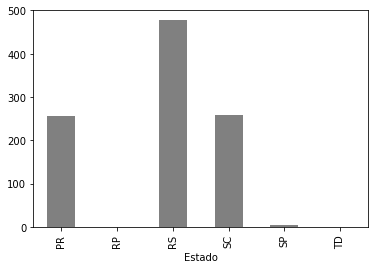

In [7]:
agrupado.plot.bar(color = 'gray')

In [8]:
#genero
agrupado = dataset.groupby(['Genero']).size()
agrupado 

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<AxesSubplot:xlabel='Genero'>

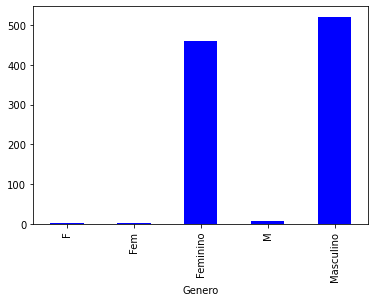

In [9]:
agrupado.plot.bar(color = 'blue')

In [10]:
dataset['score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: score, dtype: float64

Text(0.5, 1.0, 'Score')

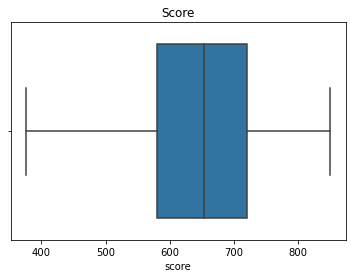

In [11]:
sns.boxplot(data=dataset, x='score').set_title('Score')

In [12]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

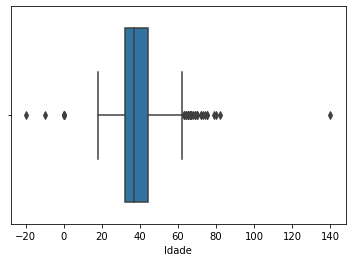

In [13]:
f2 = sns.boxplot(data=dataset, x='Idade')

AttributeError: 'FacetGrid' object has no attribute 'set_title'

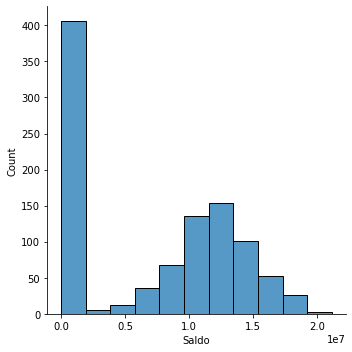

In [14]:
sns.displot(dataset['Saldo']).set_title('Saldo')

In [ ]:
dataset['Salario'].describe()

In [ ]:
sns.displot(dataset['Salario']).set_title('Salario')

In [ ]:
#contamos valores NAN
#Genero e salario
dataset.isnull().sum()

In [ ]:
dataset['Salario'].describe()



In [ ]:
mediana = sts.median(dataset['Salario'])
mediana

In [ ]:
#Substitui NAN por mediana
dataset['Salario'].fillna(mediana, inplace=True)

In [ ]:
#Veificamos se NAN naõ existe mais
dataset['Salario'].isnull().sum()

In [ ]:
#Genero, falta de padronização e NAs
agrupado = dataset.groupby(['Genero']).size()
agrupado

In [ ]:
#checa dados NAs
dataset['Genero'].isnull().sum()

In [ ]:
#Preenche NAs com Masculino (moda)
dataset['Genero'].fillna('Masculino', inplace=True)

In [ ]:
#Verificamos novamente NANs
dataset['Genero'].isnull().sum()

In [ ]:
#Padronização de acordo com o dominio
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin(['Fem','F']), 'Genero'] = "Feminino"
#Visualiza o resultado
agrupado = dataset.groupby(['Genero']).size()
agrupado

In [ ]:
dataset['Idade'].describe()

In [ ]:
#visulalizar
dataset.loc[(dataset['Idade'] <0 ) | ( dataset['Idade'] > 120)]

In [ ]:
#calcula a meediana
mediana = sts.median(dataset['Idade'])
mediana

In [ ]:
#substituir
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120), 'Idade'] = mediana

In [18]:
#veridicamos se ainda existem idades fora do dominio
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,id,score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [ ]:
#dados duplicados, buscamos pelo ID
dataset[dataset.duplicated(['id'], keep=False)]

In [16]:
#excluimos pelo ID
dataset.drop_duplicates(subset="id", keep='first',inplace=True)
#buscamos duplicados
dataset[dataset.duplicated(['id'],keep=False)]

,id,score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [24]:
#estado fora do dominiio
UF_agrupados = dataset.groupby(['Estado']).size()
UF_agrupados

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [28]:
#atribuiamos RS (moda)
dataset.loc[dataset['Estado'].isin(['RP','SP','TD']), 'Estado'] = 'RS'
agrupados = dataset.groupby(['Estado']).size()

In [29]:
#verificamos o resultado
agrupados

Estado
PR    257
RS    483
SC    258
dtype: int64

In [39]:
#outliers em salário, camos considerar 2 desvios padrão
desvio = sts.stdev(dataset['Salario'])
desvio

nan

In [41]:
#definir padrão como maior que 2 desvio padrão
#checamos se algum atende o criterio
dataset.loc[dataset.loc[dataset['Salario'] >= 2 * desvio]

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_7776/621662546.py, line 3)